#### Libraries Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set_theme() 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Dataset Loading

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.shape

(72946, 9)

In [6]:
data.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object

In [9]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

#### Data Preprocessing

In [10]:
# Convert Dates & Sort
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [11]:
data.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05 23:59:59.999000+00:00,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05 23:59:59.999000+00:00,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06 23:59:59.999000+00:00,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06 23:59:59.999000+00:00,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07 23:59:59.999000+00:00,Bitcoin,2013-05-07


In [12]:
le = LabelEncoder()
data['crypto_name'] = le.fit_transform(data['crypto_name'])
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [13]:
# Identify Numerical Columns
num_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap','crypto_name','day', 'month', 'year']

In [14]:
# Standard Scaling
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [15]:
data.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,day,month,year
0,-0.144753,-0.144040,-0.145081,-0.144282,-0.229533,-0.179447,2013-05-05 23:59:59.999000+00:00,-1.331232,2013-05-05,-1.218528,-0.444186,-3.054941
1,-0.165666,-0.165362,-0.165516,-0.165736,-0.229533,-0.195797,2013-05-05 23:59:59.999000+00:00,0.090683,2013-05-05,-1.218528,-0.444186,-3.054941
2,-0.144165,-0.142954,-0.145180,-0.144972,-0.229533,-0.179976,2013-05-06 23:59:59.999000+00:00,-1.331232,2013-05-06,-1.104872,-0.444186,-3.054941
3,-0.165647,-0.165346,-0.165561,-0.165778,-0.229533,-0.195846,2013-05-06 23:59:59.999000+00:00,0.090683,2013-05-06,-1.104872,-0.444186,-3.054941
4,-0.144878,-0.145032,-0.146940,-0.145124,-0.229533,-0.180088,2013-05-07 23:59:59.999000+00:00,-1.331232,2013-05-07,-0.991217,-0.444186,-3.054941


### EDA -> (Exploratory Data Analysis)

In [16]:
plt.style.use('seaborn-v0_8')

Text(0.5, 1.0, 'Closing Price Trend')

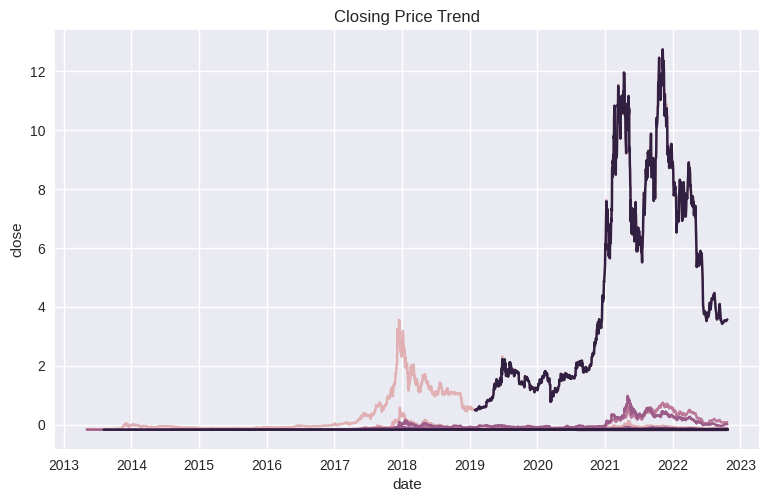

In [17]:
# Closing Price Trend
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 1)
sns.lineplot(x="date", y="close", data=data, hue="crypto_name", legend=False)
plt.title("Closing Price Trend")

Text(0.5, 1.0, 'Trading Volume Over Time')

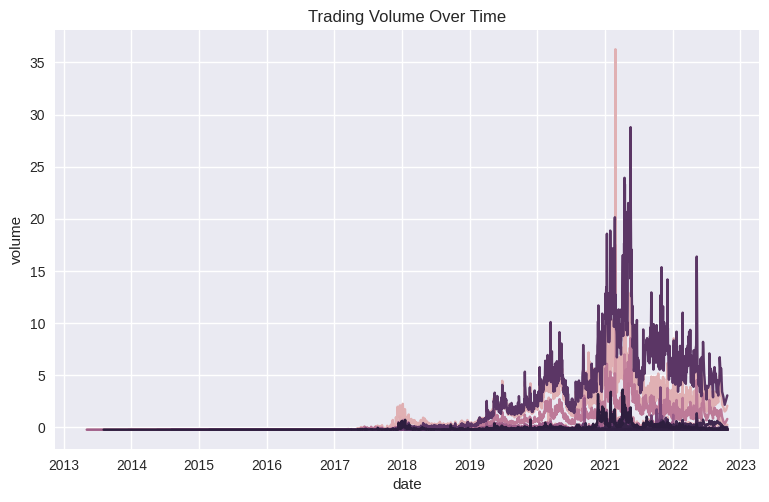

In [18]:
# 2. Volume Over Time
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 2)
sns.lineplot(x="date", y="volume", data=data, hue="crypto_name", legend=False)
plt.title("Trading Volume Over Time")

Text(0.5, 1.0, 'Price Distribution (Open, High, Low)')

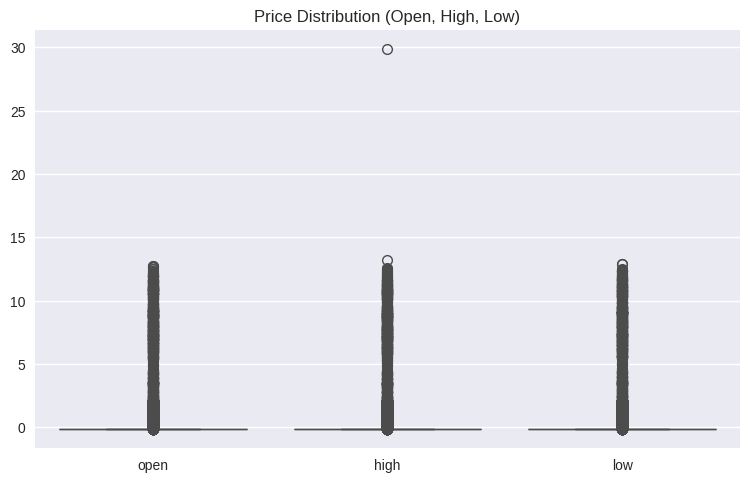

In [19]:
# 3. High vs Low Price Distribution
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 3)
sns.boxplot(data=data[num_cols[:3]])  # open, high, low
plt.title("Price Distribution (Open, High, Low)")

Text(0.5, 1.0, 'Market Cap vs Trading Volume')

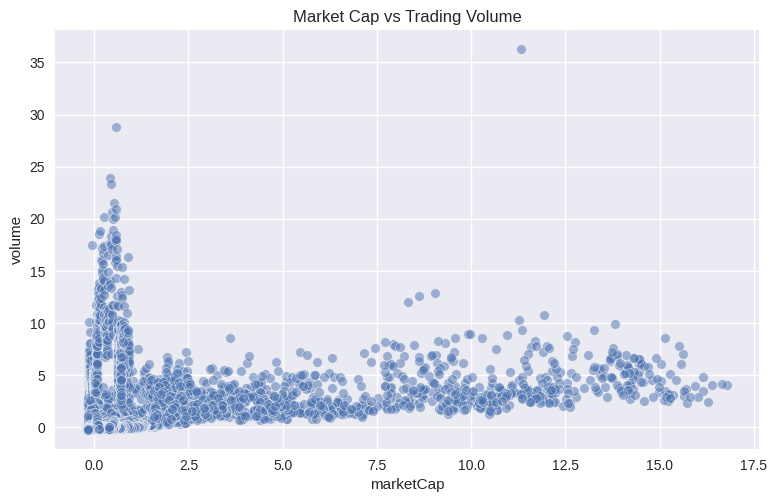

In [20]:
# 4. MarketCap vs Volume
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 4)
sns.scatterplot(x="marketCap", y="volume", data=data, alpha=0.5)
plt.title("Market Cap vs Trading Volume")

Text(0.5, 1.0, 'Daily Returns Distribution')

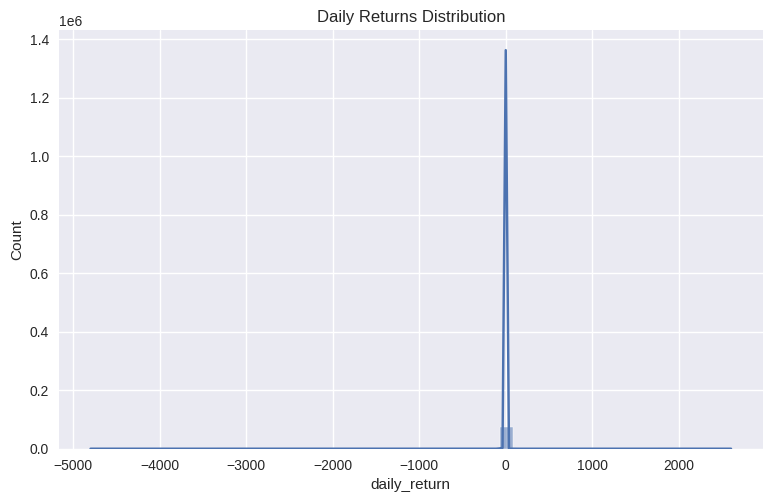

In [21]:
# 5. Daily Returns Distribution
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 5)
data['daily_return'] = data['close'].pct_change()
sns.histplot(data['daily_return'].dropna(), bins=50, kde=True)
plt.title("Daily Returns Distribution")

Text(0.5, 1.0, '30-Day Rolling Volatility')

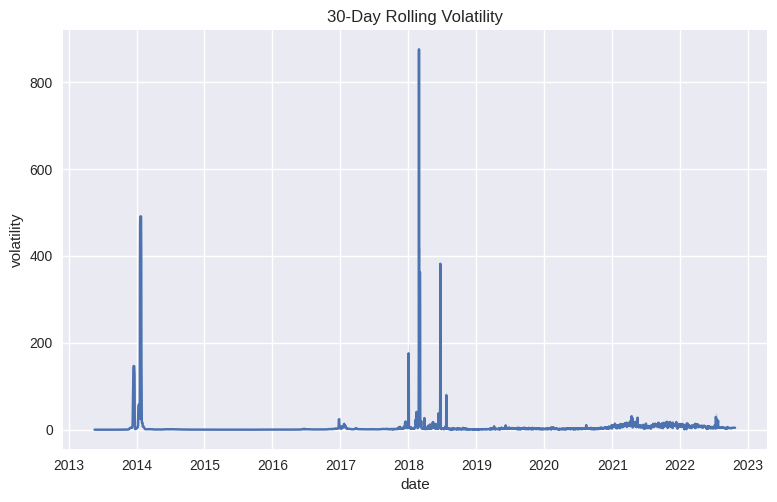

In [22]:
# 6. Volatility Over Time (Rolling Std Dev)
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 6)
data['volatility'] = data['close'].pct_change().rolling(window=30).std()
sns.lineplot(x="date", y="volatility", data=data)
plt.title("30-Day Rolling Volatility")

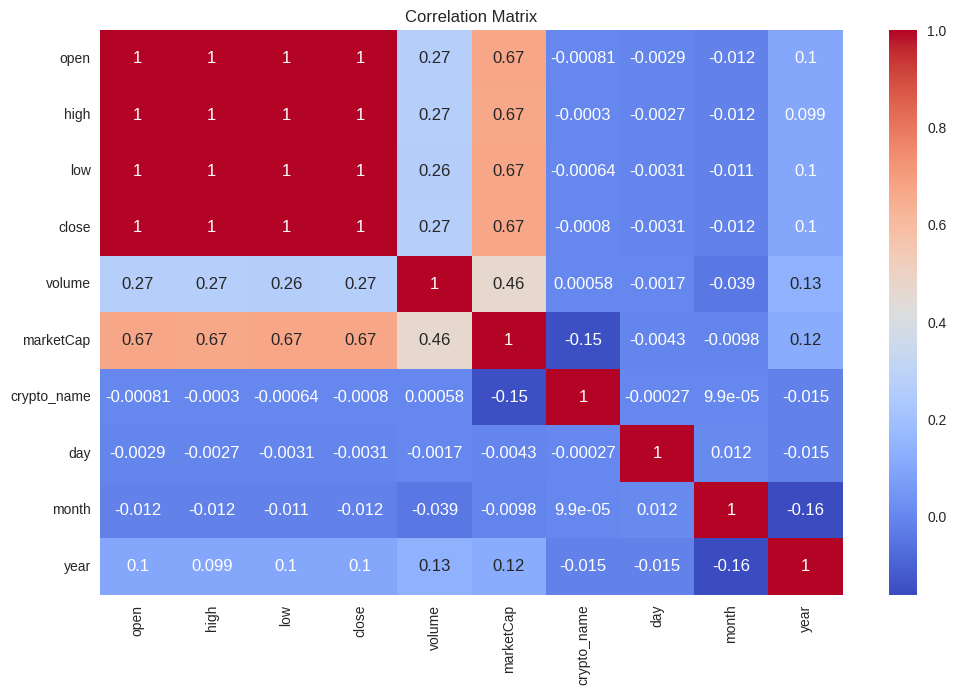

In [23]:
# 7. Correlation Matrix Heatmap
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 7)
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()